# Create figures!
### 0. set up
##### modules

In [2]:
### import modules
# operation system
import os
from os import system as oss
# science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
---
---
### 1. figure: 
- number of studies per group (ax1)
- number of studies over time (ax2)
- number of studies per tract per group (ax3)
- number of significant results per tract per group (ax4)

##### 1.1. read in

In [3]:
### get all study information into dataframe
df = pd.read_csv('data_fig1_number-year-group.txt')
df.head()

### check groups
print(set(df['group']))

{'psychiatric', 'neurological', 'healhy', 'neurodevelopmental', 'degenerative'}


##### 1.2. ax1 >> number of studies per group >> preproc

In [4]:
### define working dataFrame
df_ax1 = df

### replace mishapes in txt
df_ax1.loc[df_ax1['group']=="healhy", 'group'] = "Healthy"
df_ax1.loc[df_ax1['group']=="neurological", 'group'] = "Neurological"
df_ax1.loc[df_ax1['group']=="degenerative", 'group'] = "Neurological"
df_ax1.loc[df_ax1['group']=="neurodevelopmental", 'group'] = "Psychiatric"
df_ax1.loc[df_ax1['group']=="psychiatric", 'group'] = "Psychiatric"

### visualize to check
#df_ax1.head()

### check groups again
print(set(df_ax1['group']))

{'Healthy', 'Neurological', 'Psychiatric'}


##### 1.3 ax2 >> number of studies per year >> preproc

In [5]:
### create studycount over time 
#output
studies_over_time = {}

### loop
for year in df['year']:
    # create dict for tract 
        if year not in studies_over_time:
            studies_over_time[year] = 1
        else:
            studies_over_time[year] = studies_over_time[year]+1

### dataframe            
df_years = pd.DataFrame.from_dict(studies_over_time, orient='index')
df_years.reset_index(inplace=True)
df_years.rename(columns={'index':'year', 0:'studies'}, inplace=True)
df_years.sort_values('year', inplace=True, ascending=False)

### check it
# df_years.head()

##### 1.4.1 ax3 preproc (part 1) 

In [6]:
### read in
indat = open('data_fig1_nr-year-corrs.csv').read().splitlines()
'''
I need to get a list with the information behind nr and year as one line
'''
### get info after NR and YEAR as one-liner 
l_info = []
for line in indat[1:]:
    other = line.split(',')[2:]
    info = ', '.join(other)
# insert into list
    l_info.append(info)
    print(info+'\n')

### create lists for next step
l_tracts = []
l_domain = []
l_group = []
for line in l_info:
    info = line.split(', ')
    for threeWords in info:
        try:
            # tract
            tract = threeWords.split("*")[2]
            l_tracts.append(tract)
            # domain
            domain = threeWords.split("*")[1]
            l_domain.append(domain)
            # group
            group = threeWords.split("*")[0]
            l_group.append(group)
        except:
            next

controls*sleep*ILF_rh, , , , , , , , , , , , , , 

degenerative*visual*optic_lh, degenerative*visual*CC, , , , , , , , , , , , , 

psychiatric*reward*projection_ukn, , , , , , , , , , , , , , 

controls*reward*striatal_rh, , , , , , , , , , , , , , 

psychiatric*addiction*CC, , , , , , , , , , , , , , 

neurological*motor*CST_lh, neurological*motor*CST_rh, , , , , , , , , , , , , 

psychiatric*memory*CC, , , , , , , , , , , , , , 

neurological*motor*thalamic_lh, , , , , , , , , , , , , , 

degenerative*memory*limbic_ukn, degenerative*executive*limbic_ukn, degenerative*memory*fornix, , , , , , , , , , , , 

controls*language*striatal_lh, , , , , , , , , , , , , , 

neurological*memory*fornix, , , , , , , , , , , , , , 

psychiatric*language*thalamic_lh, psychiatric*attention*thalamic_lh, psychiatric*symptoms*MDLF_rh, , , , , , , , , , , , 

controls*executive*accumbofrontal_ukn, , , , , , , , , , , , , , 

psychiatric*mood*uncinate_lh, , , , , , , , , , , , , , 

psychiatric*executive*

##### 1.4.2 ax3 preproc (part 2) 

In [7]:
### ax3 = stacked hbarplot: number of studies per group (Neurol*, Psy*, Healthy)

### check the groups
print(set(l_group))
### here we gotta change some labels:
# Healthy
l_group = [i.replace("controls", "Healthy") for i in l_group]
l_group = [i.replace("other", "Healthy") for i in l_group]
# Neurological
l_group = [i.replace("degenerative", "Neurological") for i in l_group]
l_group = [i.replace("neurological", "Neurological") for i in l_group]
# Psychiatric
l_group = [i.replace("neurodevelopmental", "Psychiatric") for i in l_group]
l_group = [i.replace("psychiatric", "Psychiatric") for i in l_group]
# check again
print(set(l_group))


### check tracts
print(set(l_tracts))
### search and replace
# side
l_tracts = [i.replace('_lh', '') for i in l_tracts]
l_tracts = [i.replace('_rh', '') for i in l_tracts]
l_tracts = [i.replace('_RH', '') for i in l_tracts]
l_tracts = [i.replace('_ukn', '') for i in l_tracts]
l_tracts = [i.replace('_uk', '') for i in l_tracts]
# subtracts
l_tracts = [i.replace("ant", "") for i in l_tracts]
l_tracts = [i.replace("long", "") for i in l_tracts]
l_tracts = [i.replace("pos", "") for i in l_tracts]
l_tracts = [i.replace("1", "") for i in l_tracts]
l_tracts = [i.replace("2", "") for i in l_tracts]
l_tracts = [i.replace("3", "") for i in l_tracts]
# check again
print(set(l_tracts))

### check l_info
#print(l_info)
# save
l_info_save = l_info
### replace
# groups
l_info = [i.replace("controls", "Healthy") for i in l_info]
l_info = [i.replace("other", "Healthy") for i in l_info]
l_info = [i.replace("degenerative", "Neurological") for i in l_info]
l_info = [i.replace("neurological", "Neurological") for i in l_info]
l_info = [i.replace("neurodevelopmental", "Psychiatric") for i in l_info]
l_info = [i.replace("psychiatric", "Psychiatric") for i in l_info]
# tracts
l_info = [i.replace('_lh', '') for i in l_info]
l_info = [i.replace('_rh', '') for i in l_info]
l_info = [i.replace('_RH', '') for i in l_info]
l_info = [i.replace('_ukn', '') for i in l_info]
l_info = [i.replace('_uk', '') for i in l_info]
l_info = [i.replace("ant", "") for i in l_info]
l_info = [i.replace("long", "") for i in l_info]
l_info = [i.replace("pos", "") for i in l_info]
l_info = [i.replace("1", "") for i in l_info]
l_info = [i.replace("2", "") for i in l_info]
l_info = [i.replace("3", "") for i in l_info]
#print(l_info)

{'psychiatric', 'neurological', 'controls', 'other', 'neurodevelopmental', 'degenerative'}
{'Healthy', 'Neurological', 'Psychiatric'}
{'cerebellar_rh', 'AFpos_rh', 'thalamic_lh', 'SLF3_ukn', 'CC', 'CST_lh', 'thalamic_rh', 'uncinate_lh', 'ILF_lh', 'cingulum_rh', 'ILF_ukn', 'AFlong_ukn', 'accumbofrontal_ukn', 'FAT_lh', 'cerebellar', 'AFlong_rh', 'AFpos_lh', 'fornix', 'SLF2_lh', 'CST_ukn', 'AFlong_lh', 'projection_rh', 'cingulum_lh', 'Ufibers_lh', 'striatal_ukn', 'SLF2_rh', 'AF_lh', 'IFOF_rh', 'SLF3_rh', 'thalamic_ukn', 'AF_ukn', 'VOF_rh', 'SLF2_ukn', 'SLF_rh', 'AFant_lh', 'AC', 'projection_lh', 'FAT_rh', 'optic_lh', 'uncinate_rh', 'cerebellar_ukn', 'VOF_lh', 'IFOF_ukn', 'projection_ukn', 'limbic_ukn', 'SLF_ukn', 'Ufibers_ukn', 'CST_rh', 'SLF1_lh', 'SLF_lh', 'AFant_rh', 'AF_rh', 'SLF3_lh', 'striatal_lh', 'MDLF_lh', 'MDLF_rh', 'Ufibers_rh', 'limbic_rh', 'accumbofrontal_rh', 'optic_rh', 'cingulum_ukn', 'striatal_rh', 'SLF1_rh', 'ILF_rh', 'IFOF_lh', 'uncinate_ukn', 'limbic_lh', 'cerebellar_l

##### 1.4.3 ax3 create dictionary and cross-table

In [8]:
# list of keys :)
keylist = sorted(set(l_tracts)); #print(keylist)
#print(l_group)
studies_per_tract = {}

# insert keylist into dictionary
for tract in keylist:
    studies_per_tract[tract]={}
    studies_per_tract[tract]['Healthy']=0
    studies_per_tract[tract]['Neurological']=0
    studies_per_tract[tract]['Psychiatric']=0
#print(studies_per_tract)

### now fill the dictionary with the actuall data :)
for key in studies_per_tract:
    for line in l_info:
# check if tract is in the study
        if key in line:
# check if study is patient or healthy
            if 'Healthy' in line:
                studies_per_tract[key]['Healthy'] = studies_per_tract[key]['Healthy']+1
            elif 'Neurological' in line:
                studies_per_tract[key]['Neurological'] = studies_per_tract[key]['Neurological']+1
            elif 'Psychiatric' in line:
                studies_per_tract[key]['Psychiatric'] = studies_per_tract[key]['Psychiatric']+1                
#print(studies_per_tract)

### create crosstable
### Create the DF from dictionary
df_f1n_ax3 = pd.DataFrame.from_dict(studies_per_tract, orient='index')

# sort by total number of cases
df_f1n_ax3['total'] = df_f1n_ax3.loc[:, 'Healthy':'Psychiatric'].sum(1)
df_f1n_ax3.sort_values('total', inplace=True, ascending=True)
df_f1n_ax3.drop('total', axis=1, inplace=True)
df_f1n_ax3.head()


,Healthy,Neurological,Psychiatric
AC,0,0,1
accumbofrontal,2,0,0
VOF,2,0,0
optic,0,1,2
MDLF,1,0,3


##### 1.5.1 ax4 order of crosstab

In [9]:
### bring the lists together :)
# dataframe
df_f1n = pd.DataFrame(list(zip(l_group, l_tracts)), 
                     columns = ['groups', 'tracts'])
# cross table
ct_f1n = pd.crosstab(index=df_f1n['tracts'], 
                     columns=df_f1n['groups'],
                    margins=True)

ct_f1n.sort_values('All', ascending=True, inplace=True)
ct_f1n.drop('All', inplace=True)
ct_f1n.drop('All', axis=1, inplace=True)
ct_f1n

groups,Healthy,Neurological,Psychiatric
tracts,,,
AC,0,0,2
accumbofrontal,2,0,0
optic,0,1,2
VOF,4,0,0
MDLF,1,0,4
Ufibers,4,2,3
FAT,5,5,1
cerebellar,1,13,2
limbic,5,5,14


### 1.6 create figure!

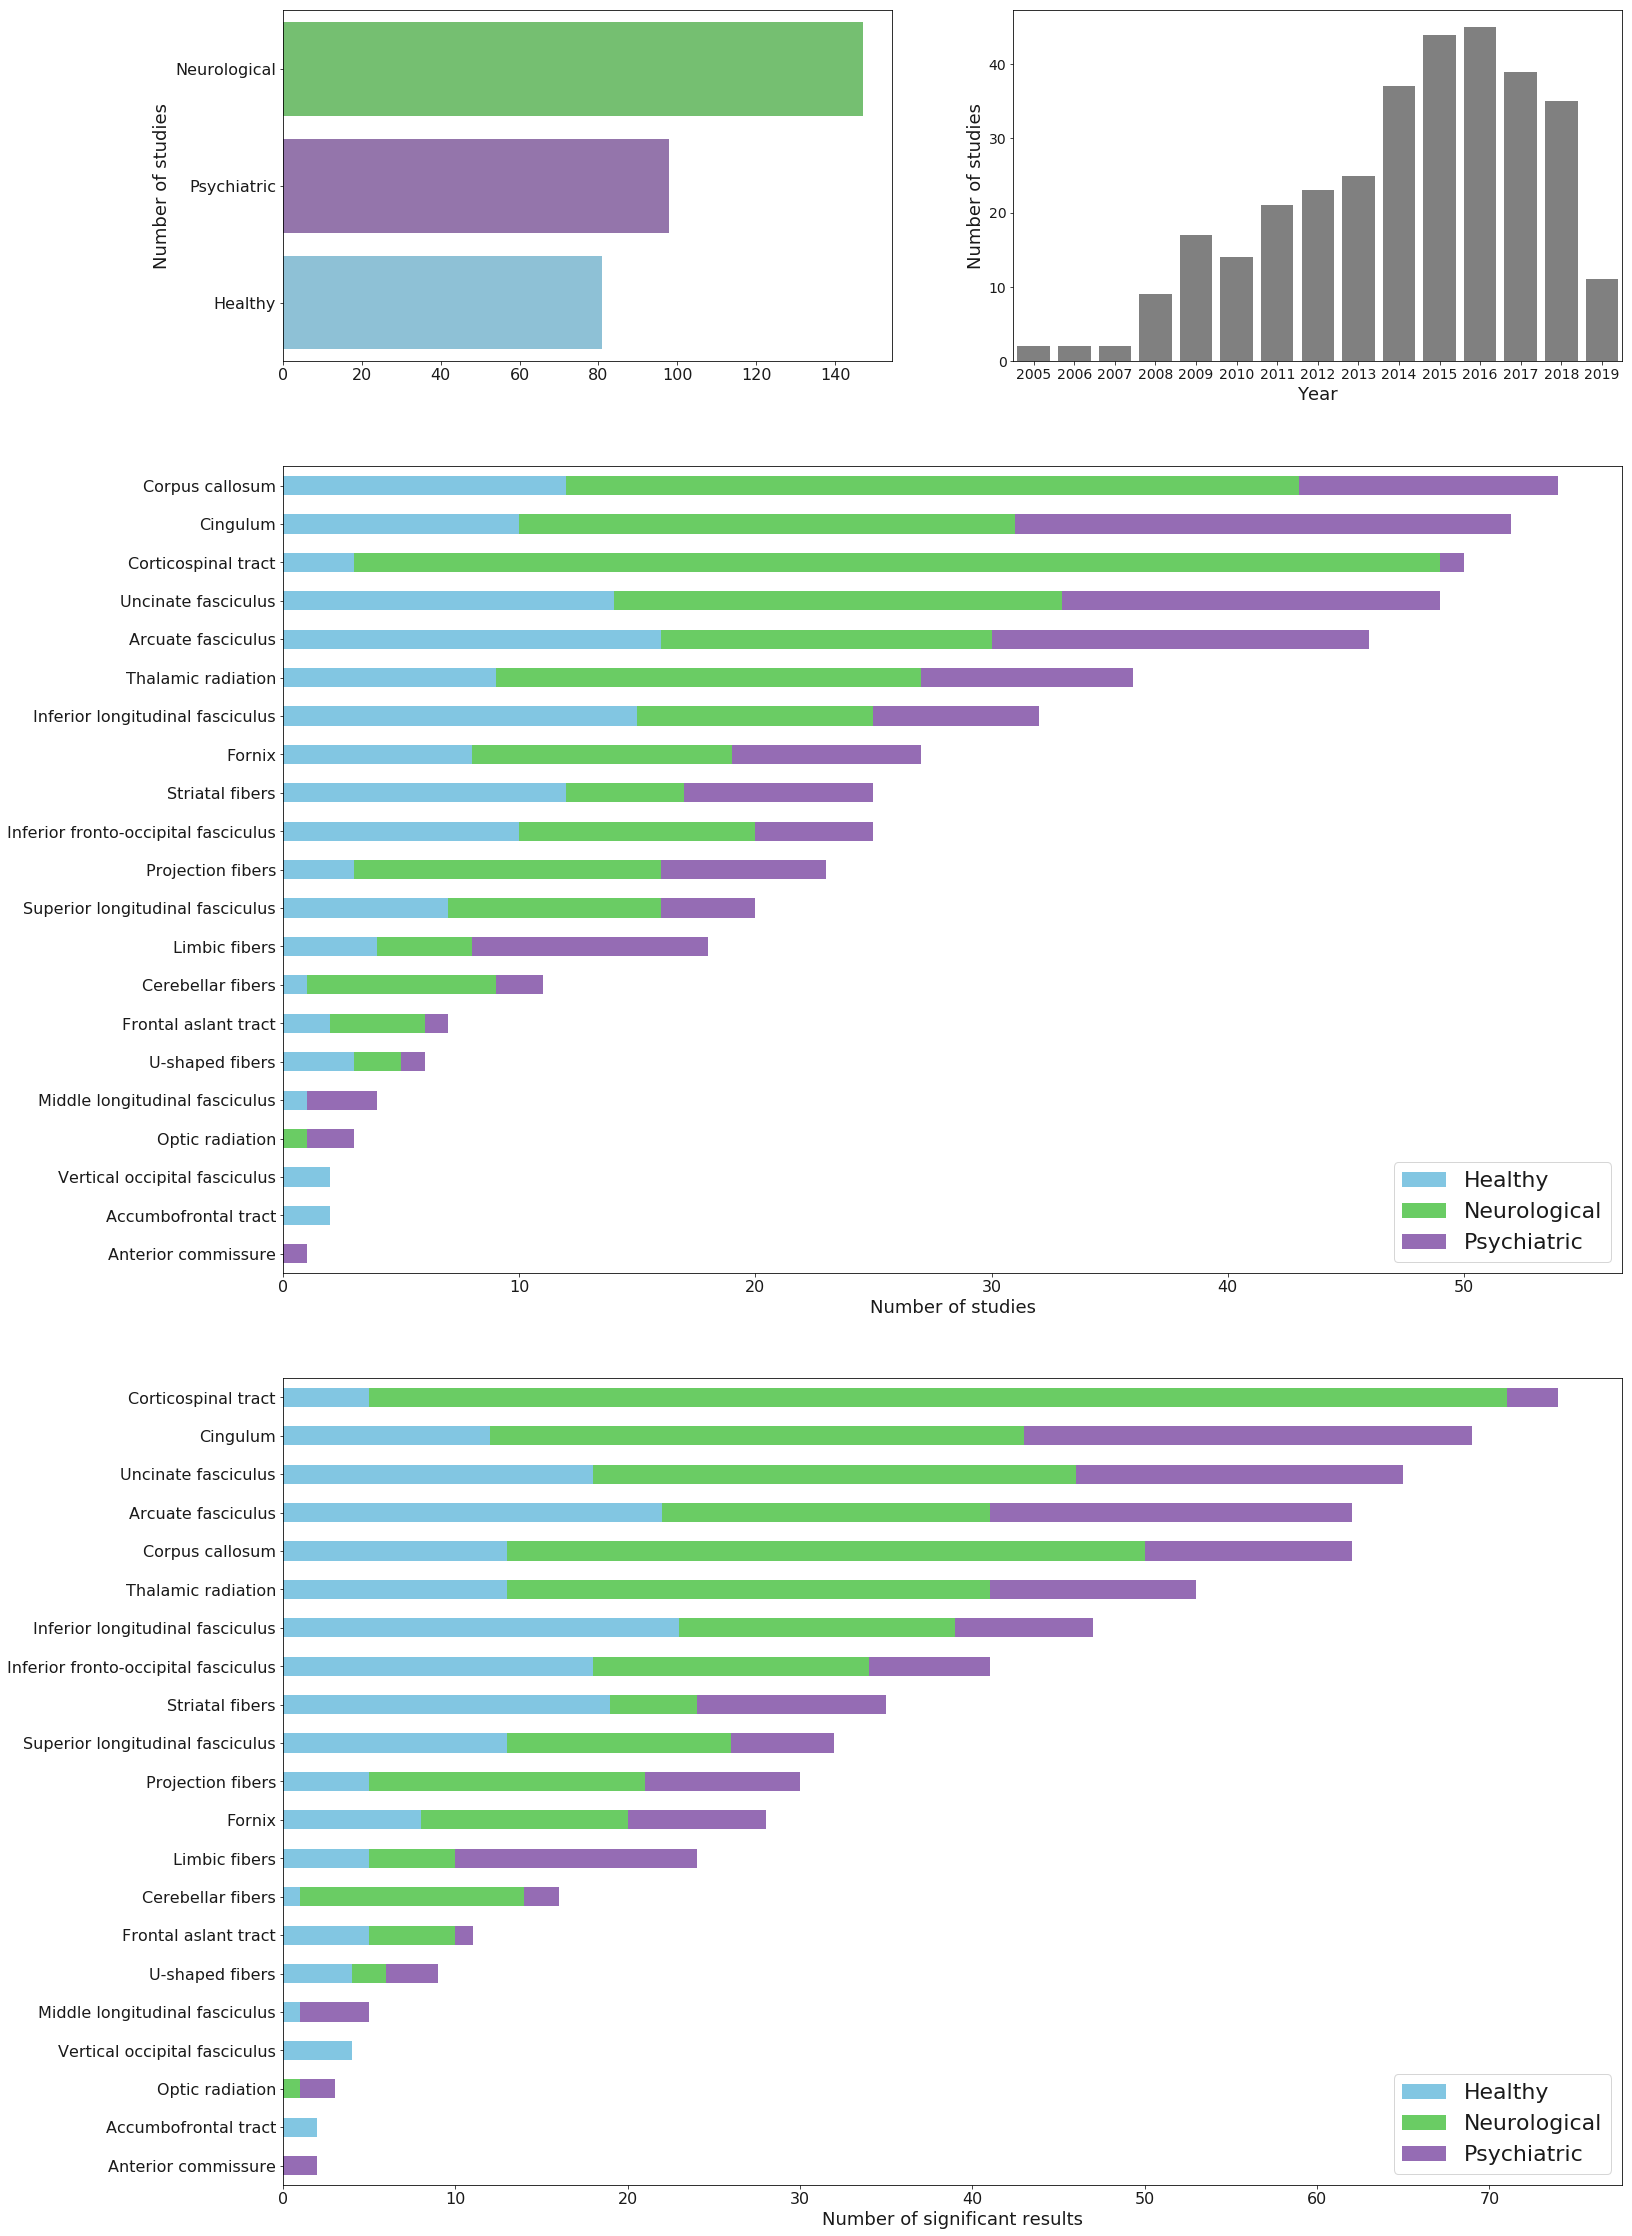

In [10]:
### test figure
gridsize = (5, 2)
f = plt.figure(figsize = (24,40)) #(32,30)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid(gridsize, (3, 0), colspan=2, rowspan=2)


### ax1
sns.set_color_codes("muted")
sns.countplot(y='group', data=df_ax1, ax=ax1, palette=['g', 'm', "c"],
             order=df_ax1['group'].value_counts(ascending=False).index, orient='h')
            # order=df_ax1['group'].value_counts().index
ax1.tick_params(labelsize=16)
ax1.set_xlabel("")
ax1.set_ylabel("Number of studies", size=18)

### ax2 
sns.barplot(x='year', y='studies', data=df_years, ax=ax2, color="Grey")
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Year', size=18)
ax2.set_ylabel("Number of studies", size=18)

### ax3
g1 = df_f1n_ax3.plot(kind="barh", stacked=True, title=tract, ax=ax3, color=['c', 'g', 'm'])
# change tractnames
yticks_names = ["Corpus callosum", "Cingulum", "Corticospinal tract", "Uncinate fasciculus", "Arcuate fasciculus", "Thalamic radiation", "Inferior longitudinal fasciculus", "Fornix", "Striatal fibers", "Inferior fronto-occipital fasciculus", "Projection fibers", "Superior longitudinal fasciculus", "Limbic fibers", "Cerebellar fibers", "Frontal aslant tract",  "U-shaped fibers", "Middle longitudinal fasciculus", "Optic radiation", "Vertical occipital fasciculus", "Accumbofrontal tract", "Anterior commissure"]
yticks_names.reverse()
ax3.set_yticklabels(yticks_names)
# set stuff
ax3.set_title('')
ax3.tick_params(labelsize=16)
ax3.set_xlabel("Number of studies", size=18)
ax3.set_ylabel("", size=20)
ax3.legend(ncol=1, loc="lower right", frameon=True, prop={'size':22})


### ax4 (NEW ONE^^)
g = ct_f1n.plot(kind="barh", stacked=True, title=tract, ax=ax4, color=['c', 'g', 'm'])
# change tractnames
yticks_names = ["Corticospinal tract", "Cingulum", "Uncinate fasciculus", "Arcuate fasciculus", "Corpus callosum", "Thalamic radiation", "Inferior longitudinal fasciculus", "Inferior fronto-occipital fasciculus", "Striatal fibers", "Superior longitudinal fasciculus", "Projection fibers", "Fornix", "Limbic fibers", "Cerebellar fibers", "Frontal aslant tract", "U-shaped fibers", "Middle longitudinal fasciculus", "Vertical occipital fasciculus", "Optic radiation", "Accumbofrontal tract", "Anterior commissure"]
yticks_names.reverse()
ax4.set_yticklabels(yticks_names)
# set stuff
ax4.set_title('')
ax4.tick_params(labelsize=16)
ax4.set_xlabel("Number of significant results", size=18)
ax4.set_ylabel("", size=20)
ax4.legend(ncol=1, loc="lower right", frameon=True, prop={'size':22})

### save it
plt.subplots_adjust(hspace=0.3)
fig = plt.gcf()
fig.savefig('figure1.pdf', format="pdf", dpi=600)
plt.show()

In [11]:
df_f1n_ax3.to_csv('Results_NumberOfStudiesPerTract.csv', index=True)
ct_f1n.to_csv('Results_NumberOfResultsPerTract.csv', index=True)

--- 
---
---
# Create figure 2 ... tract, domain, side, nr
### 1. data preproc for DF¶
##### 1.1. read data & create workable list

In [14]:
inp = open('data_fig1_nr-year-corrs.csv').read().splitlines()
print(inp[1])
### create a readible list
info_list = []
# loop
for line in inp[1:]:
    temp = line.split(',')[2:]; #print(temp)
# insert into list
    for threeWords in temp:
        if threeWords != '':
            info_list.append(threeWords)
# check
'''for e in info_list:
    print(e)
'''

0,2019,controls*sleep*ILF_rh,,,,,,,,,,,,,,


'for e in info_list:\n    print(e)\n'

##### 1.2. check labels

In [15]:
### goal
dic = {}
tract_list = []
domain_list = []
side_list = []
### loop
for e in info_list:
    domain = e.split('*')[1]
    tract_side = e.split('*')[2]
    try:
        tract = tract_side.split('_')[0]
        side = tract_side.split('_')[1]
    except:
        tract = tract_side
        side = "ukn"
# fill the lists 
    tract_list.append(tract)
    domain_list.append(domain)
    side_list.append(side)
# fill the dict
    if tract not in dic:
        dic[tract]={}
    if domain not in dic[tract]:
        dic[tract][domain]={}
    if side not in dic[tract][domain]:
        dic[tract][domain][side]=1
    else:
        dic[tract][domain][side]+=1

### from dictionary to DF

#index = pd.MultiIndex.from_product(dic.keys(), dic[i])

df_fig2 = pd.DataFrame.from_dict({(i,j,k): dic[i][j][k] 
                           for i in dic.keys() 
                           for j in dic[i].keys()
                           for k in dic[i][j].keys()},
                       orient='index')

df_fig2.reset_index(inplace=True)
df_fig2

,index,0
0,"(ILF, sleep, rh)",1
1,"(ILF, visual, lh)",4
2,"(ILF, visual, rh)",3
3,"(ILF, memory, lh)",5
4,"(ILF, memory, rh)",3
...,...,...
268,"(VOF, visual, rh)",1
269,"(VOF, motor, lh)",1
270,"(VOF, motor, rh)",1
271,"(AC, reward, ukn)",1


##### 1.3 create stacked barplot

In [16]:
df_f2n = pd.DataFrame(list(zip(tract_list, domain_list, side_list)),
                     columns = ['tract', 'domain', 'side'])

df_f2n

,tract,domain,side
0,ILF,sleep,rh
1,optic,visual,lh
2,CC,visual,ukn
3,projection,reward,ukn
4,striatal,reward,rh
...,...,...,...
669,cingulum,motor,lh
670,ILF,motor,rh
671,thalamic,motor,rh
672,thalamic,executive,rh


AC
AF
AFant
AFlong
AFpos
CC
CST
FAT
IFOF
ILF
MDLF


/Users/PatCat/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SLF
SLF1
SLF2
SLF3
Ufibers
VOF
accumbofrontal
cerebellar
cingulum
fornix
limbic
optic
projection
striatal
thalamic
uncinate


<Figure size 1440x720 with 0 Axes>

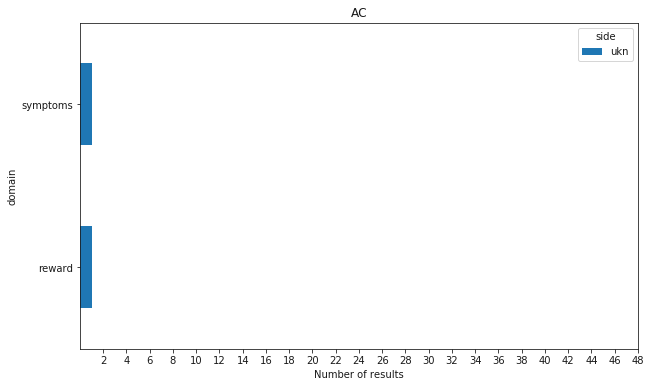

<Figure size 1440x720 with 0 Axes>

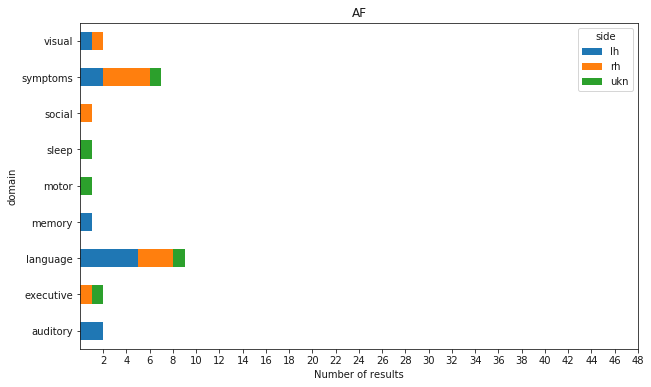

<Figure size 1440x720 with 0 Axes>

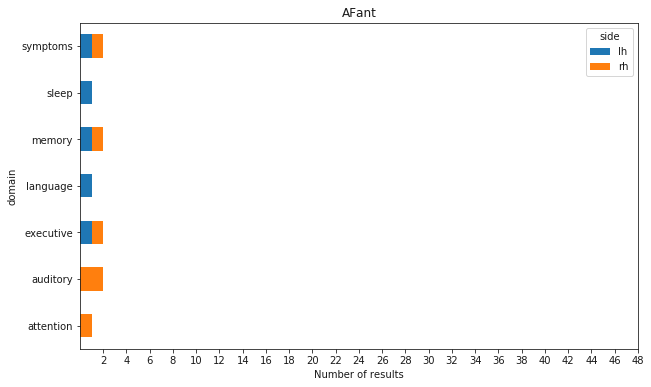

<Figure size 1440x720 with 0 Axes>

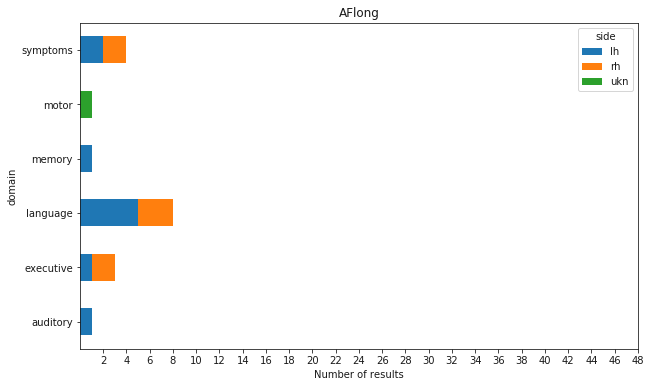

<Figure size 1440x720 with 0 Axes>

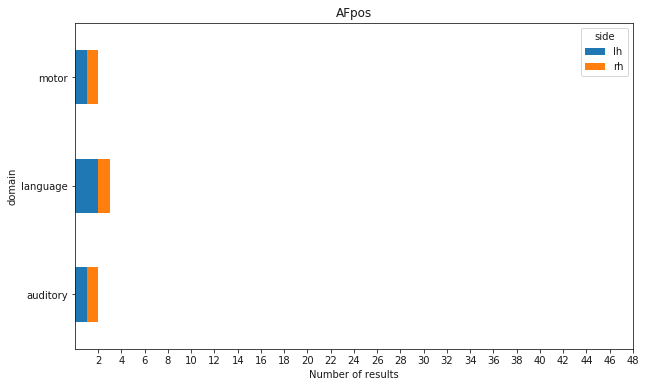

<Figure size 1440x720 with 0 Axes>

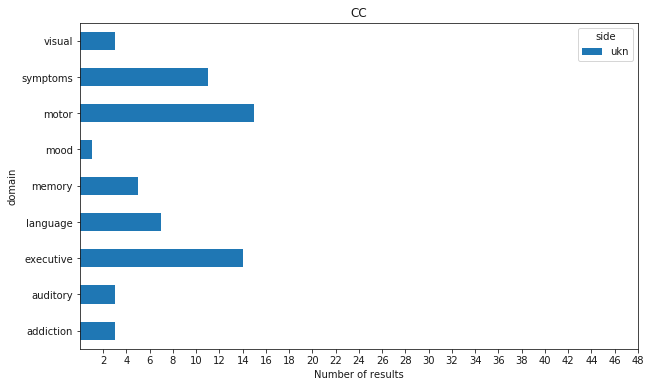

<Figure size 1440x720 with 0 Axes>

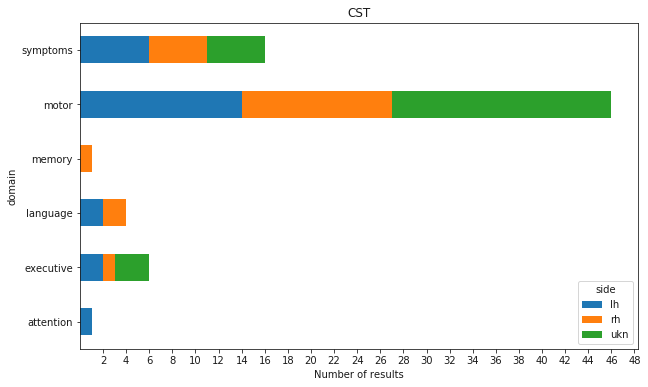

<Figure size 1440x720 with 0 Axes>

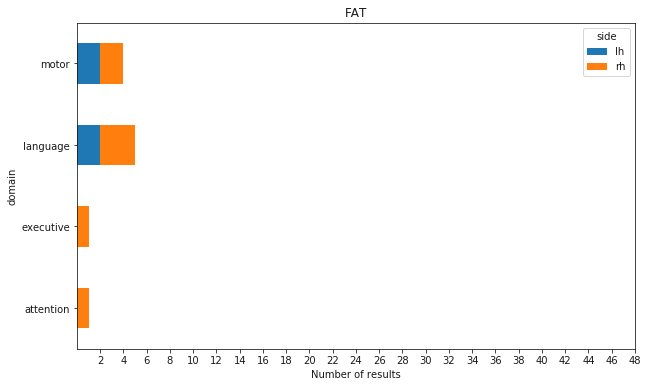

<Figure size 1440x720 with 0 Axes>

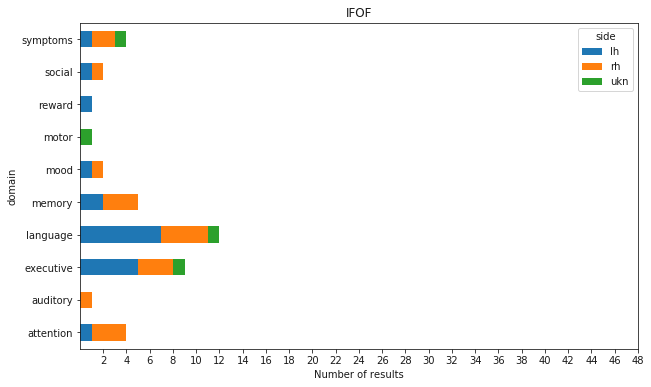

<Figure size 1440x720 with 0 Axes>

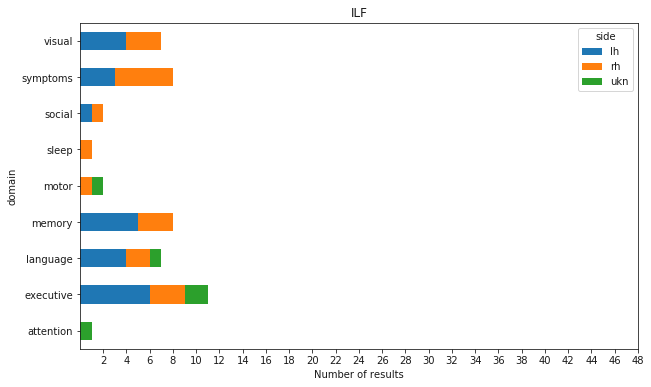

<Figure size 1440x720 with 0 Axes>

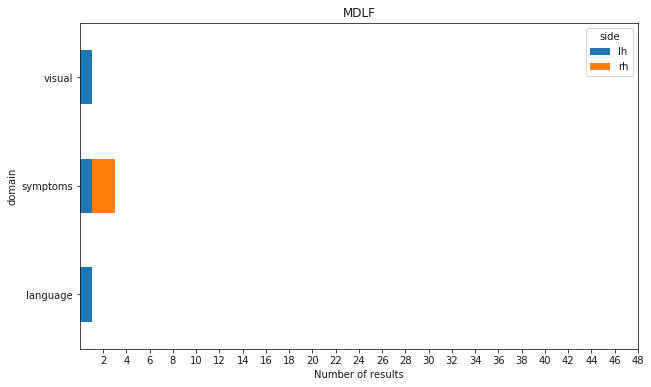

<Figure size 1440x720 with 0 Axes>

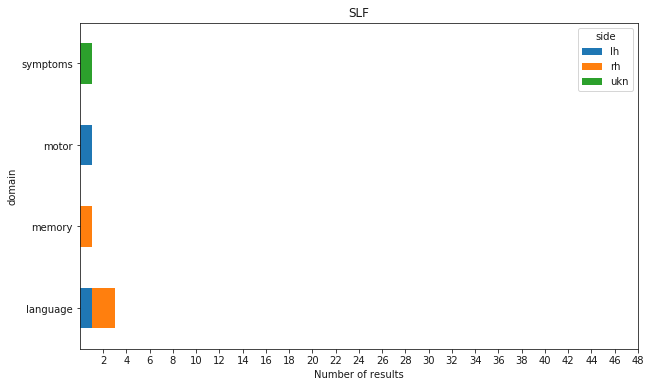

<Figure size 1440x720 with 0 Axes>

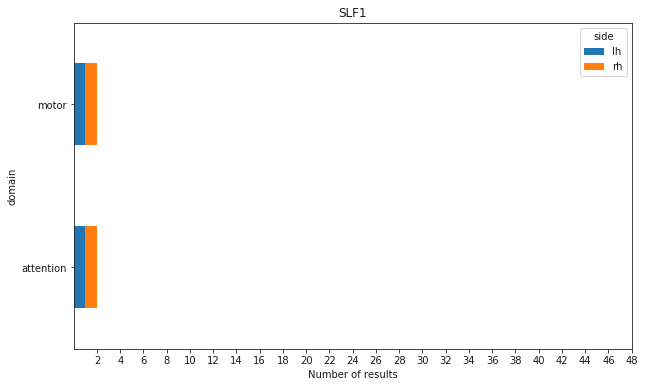

<Figure size 1440x720 with 0 Axes>

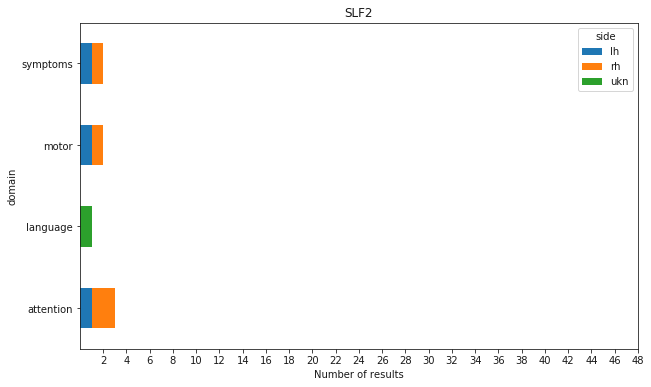

<Figure size 1440x720 with 0 Axes>

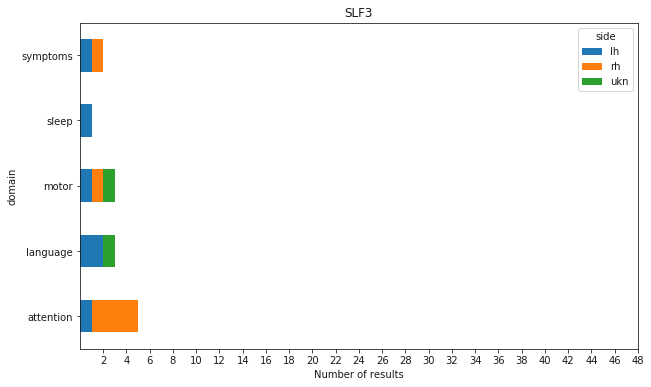

<Figure size 1440x720 with 0 Axes>

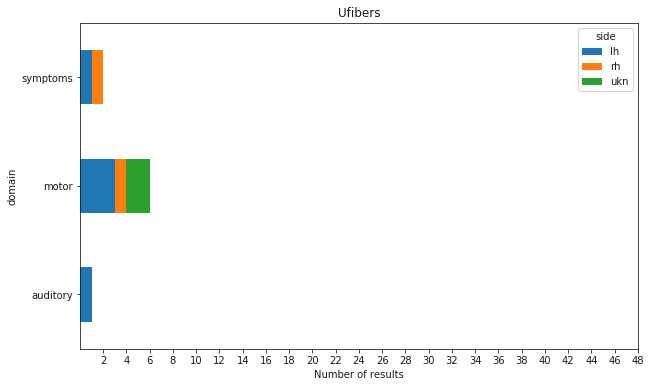

<Figure size 1440x720 with 0 Axes>

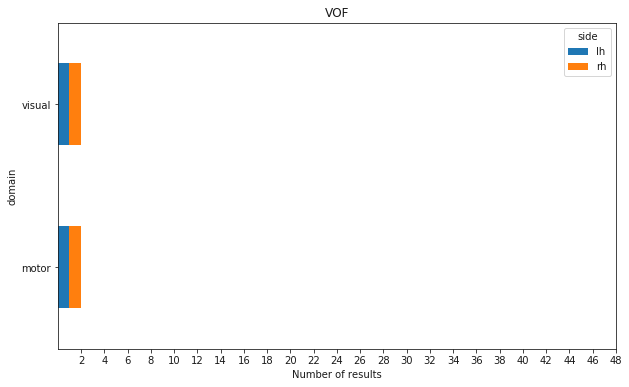

<Figure size 1440x720 with 0 Axes>

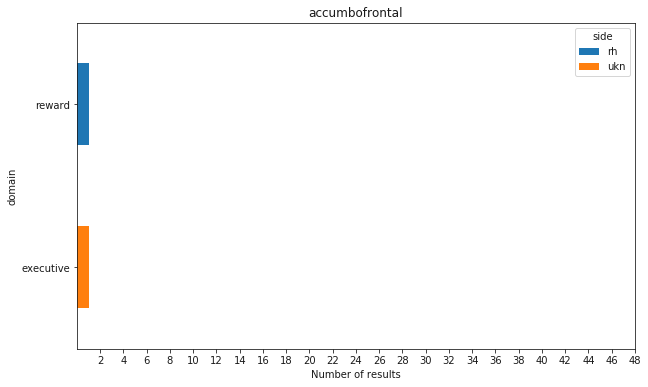

<Figure size 1440x720 with 0 Axes>

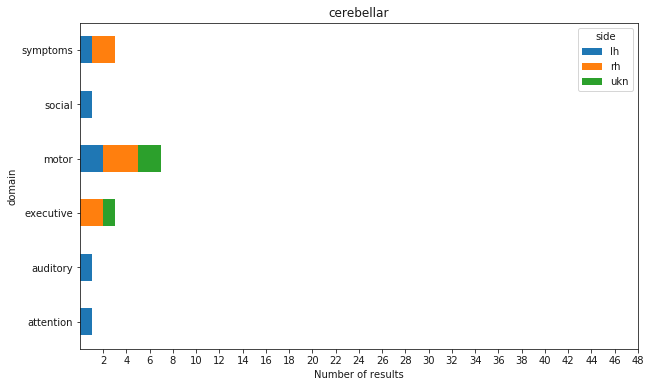

<Figure size 1440x720 with 0 Axes>

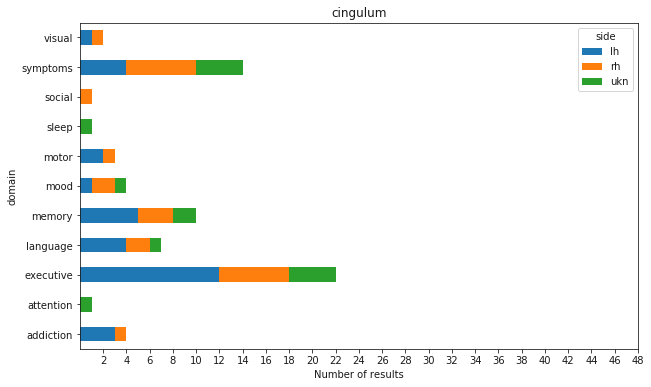

<Figure size 1440x720 with 0 Axes>

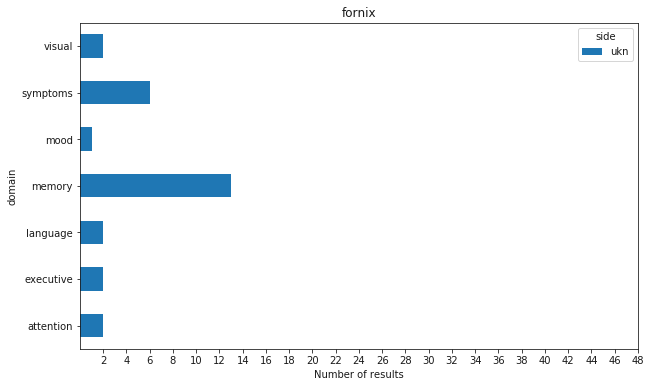

<Figure size 1440x720 with 0 Axes>

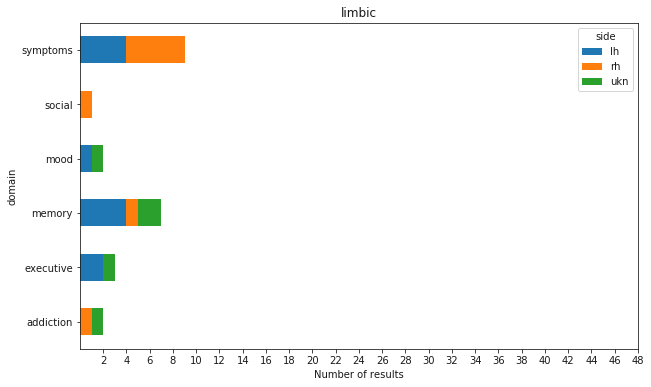

<Figure size 1440x720 with 0 Axes>

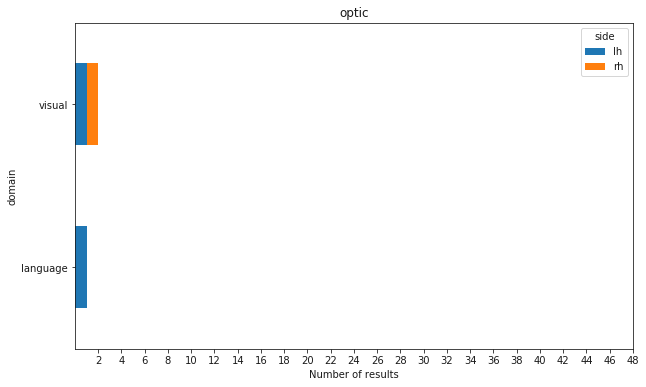

<Figure size 1440x720 with 0 Axes>

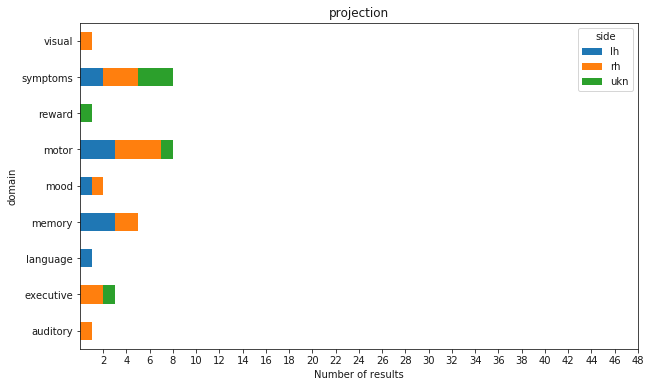

<Figure size 1440x720 with 0 Axes>

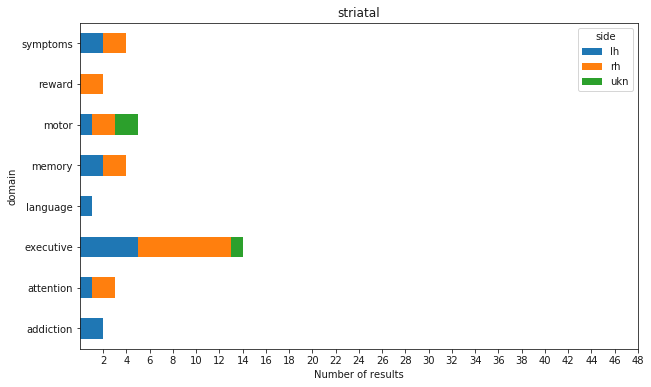

<Figure size 1440x720 with 0 Axes>

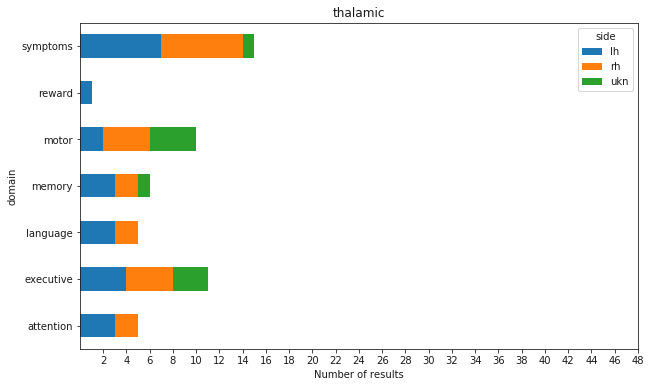

<Figure size 1440x720 with 0 Axes>

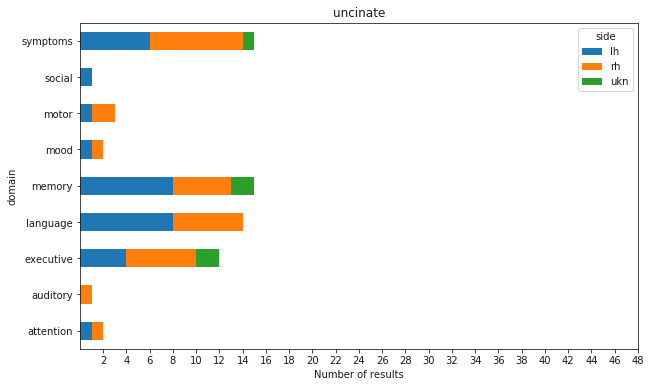

In [17]:
### prep
bla = sorted(set(df_f2n['tract']))
x_tick_list = [i for i in range(2, 49, 2)]


output_dir = "figures2_try"
oss('mkdir %s' %(output_dir))
### looop
for tract in bla:
    # create temporary cross-table
    print(tract)
    x = df_f2n[df_f2n['tract']==tract]
    ctable = pd.crosstab(index=x['domain'], columns=x['side'])
    ctable.to_excel(output_dir+"/"+tract+'.xls')
    # figure
    plt.figure(figsize=(20,10))
    g = ctable.plot(kind="barh", stacked=True, title=tract)
    g.set(xlabel='Number of results', xticks=x_tick_list)
    savepath = output_dir+"/"+tract+"_countX.pdf"
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    fig.savefig(savepath, format='pdf')
    